## **Introduction**

Previously you have learned how to model driven harmonic oscillators using numerical integration techniques, namely the Runge-Kutta. In this notebook you will learn how to use numpy arrays as matrices to properly model the motion of two coupled oscillators with two different external driving forces. Below is a picture describing the system in question.

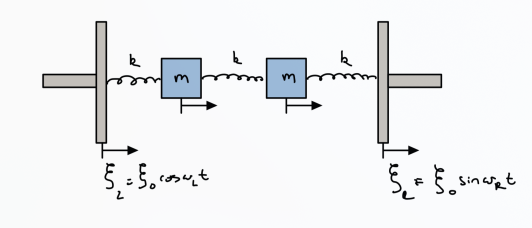


The task for this assignment will be to graph the motion of both masses and the power dissipated over time.

## **Useful Information**

As mentioned above, in this notebook I would like you to use numpy arrays to store the variables of this system like you do in class. You can construct and treat arrays exactly the same as you do matrices.

#### Basics of Arrays
To make an array in python using numpy, you will use the `np.array` function. This has been used in all of the other assignments regarding the Runge-Kutta. The difference is we used those as lists and we will use them as matrices now. The most difficult part of arrays is understanding the dimension of what you are working with. The easiest way to determine the size of the array you are using is to use the function: `.shape` function. For example:

In [7]:
import numpy as np
arr1 = np.array([1,2])
arr2 = np.array([[1,2],[3,4]])
arr3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr1.shape, arr2.shape, arr3.shape)

(2,) (2, 2) (3, 3)


In the above example I have made a 2x1, 2x2, and 3x3 arrays. In linear algebra the first one is a vector and the other two are normal matrices. Numpy also has useful functions for manupulating the arrays. If for example you have a square matrix you can take the inverse of it using `np.linalg.inv(Array)` where Array is the name of the matrix you want to take the inverse of. You can also do matrix/vector multiplication provided the dimensions work together properly. To multiply to matrices, type: `Array1.dot(Array2)`. This will multipily the array "Array1" by "Array2' in the order they are typed; Array1 x Array2. The inverse and multiplication functions will be useful for this project so you do not have to multiply the matrices yourself.

## **Final Remarks and Hints for the Assignment**

This problem is very close in spirit to the pendulum Runge-Kutta assignment in the sense that you mostly need to just define the differential equation for the system and then plug it into the Runge-Kutta. For this you will need the mass matrix, spring constant matrix, damping coefficient matrix, and the driving force matrix. All of the matrices besides the driving force one do not very with time. To properly construct the driving force matrix you will need to construct a definition that takes in time as an input so the driving forces can properly vary with time. When defining the differential equations of motion you will set it up the same as you did for the uncoupled system but now the xdot variable will need to be a numpy array as well that holds the position of the first and second masses. For example:

In [6]:
def EOM(t,p):
    x = np.array([p[0], p[2]])

    xdot = np.array([p[1], p[3]])

    xddot = your differential equation
    .
    .
    .

SyntaxError: invalid syntax (1121907673.py, line 6)

Try to use the `Array1.dot.(Array2)` and `np.linalg.inv(Array)` to construst your inverse M matrix and multiplying it to the other side.

For this assignment you will also be asked to find the average power required to keep the system oscillating at a constant amplitude. Finding the average power is not trivial though because you have two different driving frequencies with unique periods. To get around this we will be making a window to examine the motion of the masses and find a period to use from there. Here is the code to make this window:

In [1]:
def moving_average(P_diss_instant, window_size):
    """
    Calculates the simple moving average of a 1D NumPy array.

    Args:
        data (np.array): The input 1D NumPy array.
        window_size (int): The size of the moving average window.

    Returns:
        np.array: A new NumPy array containing the moving averages.
    """
    if not isinstance(data, np.ndarray) or data.ndim != 1:
        raise ValueError("Input 'data' must be a 1D NumPy array.")
    if not isinstance(window_size, int) or window_size <= 0:
        raise ValueError("Input 'window_size' must be a positive integer.")
    if window_size > len(data):
        raise ValueError("Window size cannot be greater than the data length.")

    # Create an array of ones for convolution to calculate the sum within the window
    weights = np.ones(window_size) / window_size
    
    # Convolve the data with the weights to get the moving average
    # 'valid' mode returns only the parts where the convolution fully overlaps
    moving_avg = np.convolve(data, weights, mode='same')
    
    return moving_avg

Do not worry too much about this definition, just know it defines a window in which we examine the motion of the masses and find the average inside this window. From here you can pass into the definition your instantaneous power function and the window you want to make. For the window sizes, make a window the size of one period for both the left and right frequencies independently. To do this you will need to define a variable for the period and divide it by your incramental dt to determine the length of the window needed. By passing these two arguments into the function defined above you will have a function of the average power dissipated over one period depending on whether you are considering the right or left oscillators frequency.

## **Assignment**

For this notebook you need to graph the motion of both masses on the same graph following the above pictures scenario. Note the two walls are driven as a cosine on the left wall and a sine on the right wall. The initial condition you should use are:

m1 = 1
m2 = 2
left spring = three different spring forces
middle spring = three different spring forces
right spring = three different spring forces
b = 1
xi_0 = 0.01
omega_l = three differnet choices
omega_r = three different choices

This means you should three different graphs with both masses on each graph. Choose intersting numbers for the spring constants and driving frequency to explore how changing different values effects the motion of the blocks.

After graphing the motions, you must also graph the power dissipated by the system as a function of time for each of the scenarios you choose.

After finding the average power dissipated choose one of your three scenarios so that the average power dissipated over one period is constant. This will be done by varying the driving frequencies. There is a certain relationship you should find for nearly constant average power dissipation. Find this relationship and show the average power dissipated graph is constant and write a brief description commenting on why the relationship between the two frequencies needs to be what it is for this constant average power dissipation over one period.